In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    log_loss,
    balanced_accuracy_score,
    matthews_corrcoef,
    average_precision_score
)
import warnings
warnings.filterwarnings("ignore")

from catboost import CatBoostClassifier


In [26]:
df=pd.read_csv("/kaggle/input/voice-gender-prediction/gender_voice_dataset.csv")

In [27]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [28]:
df.shape

(3168, 21)

In [29]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [31]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [32]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [33]:
numerical_cols = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 
                  'sp.ent', 'sfm', 'centroid', 'meanfun', 'minfun', 'maxfun', 
                  'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
categorical_col = 'label'
selected_cols = ['meanfreq', 'sd', 'meanfun', 'sp.ent'] 

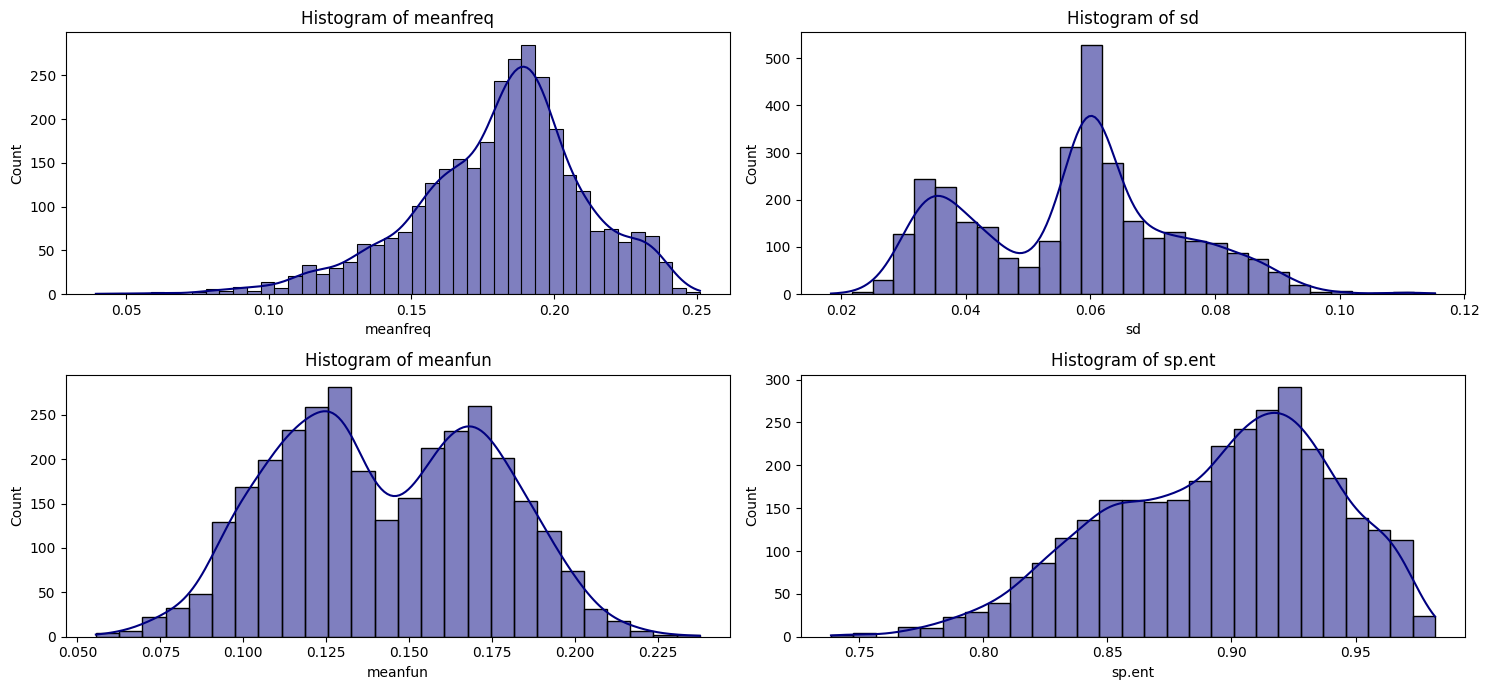

In [34]:
plt.figure(figsize=(15, 7))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True,color="navy")
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

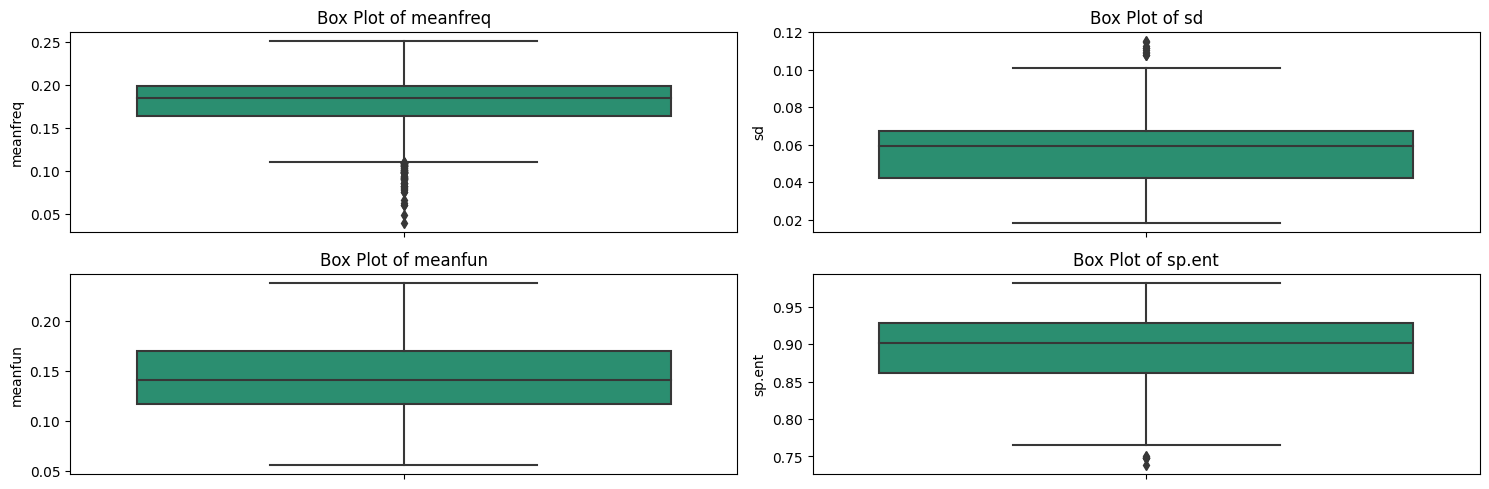

In [35]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col],palette="Dark2")
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

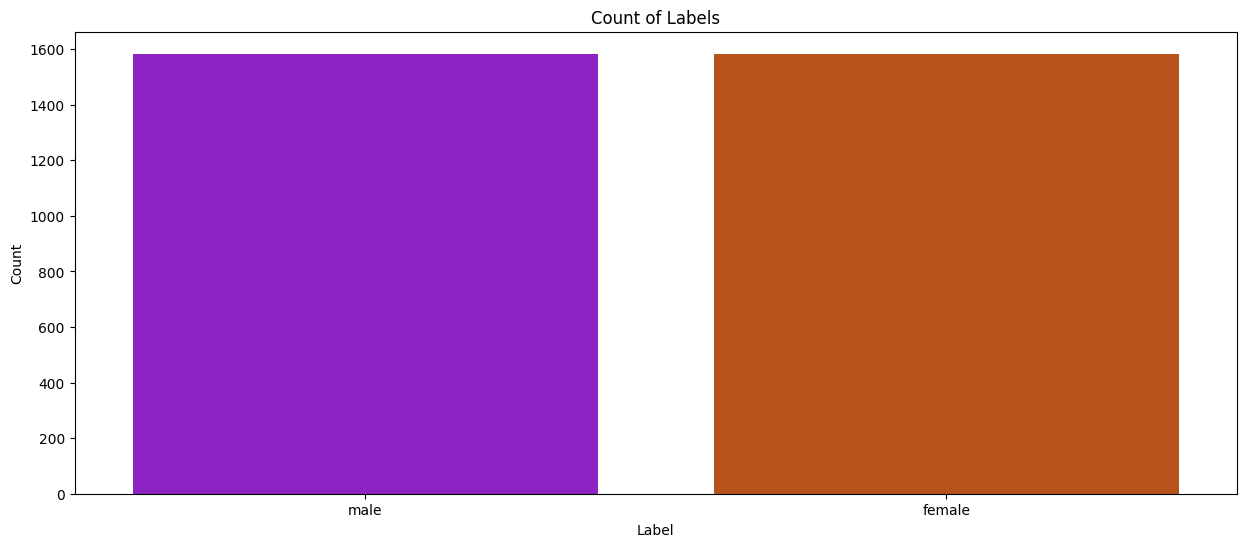

In [36]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df[categorical_col],palette="gnuplot")
plt.title('Count of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

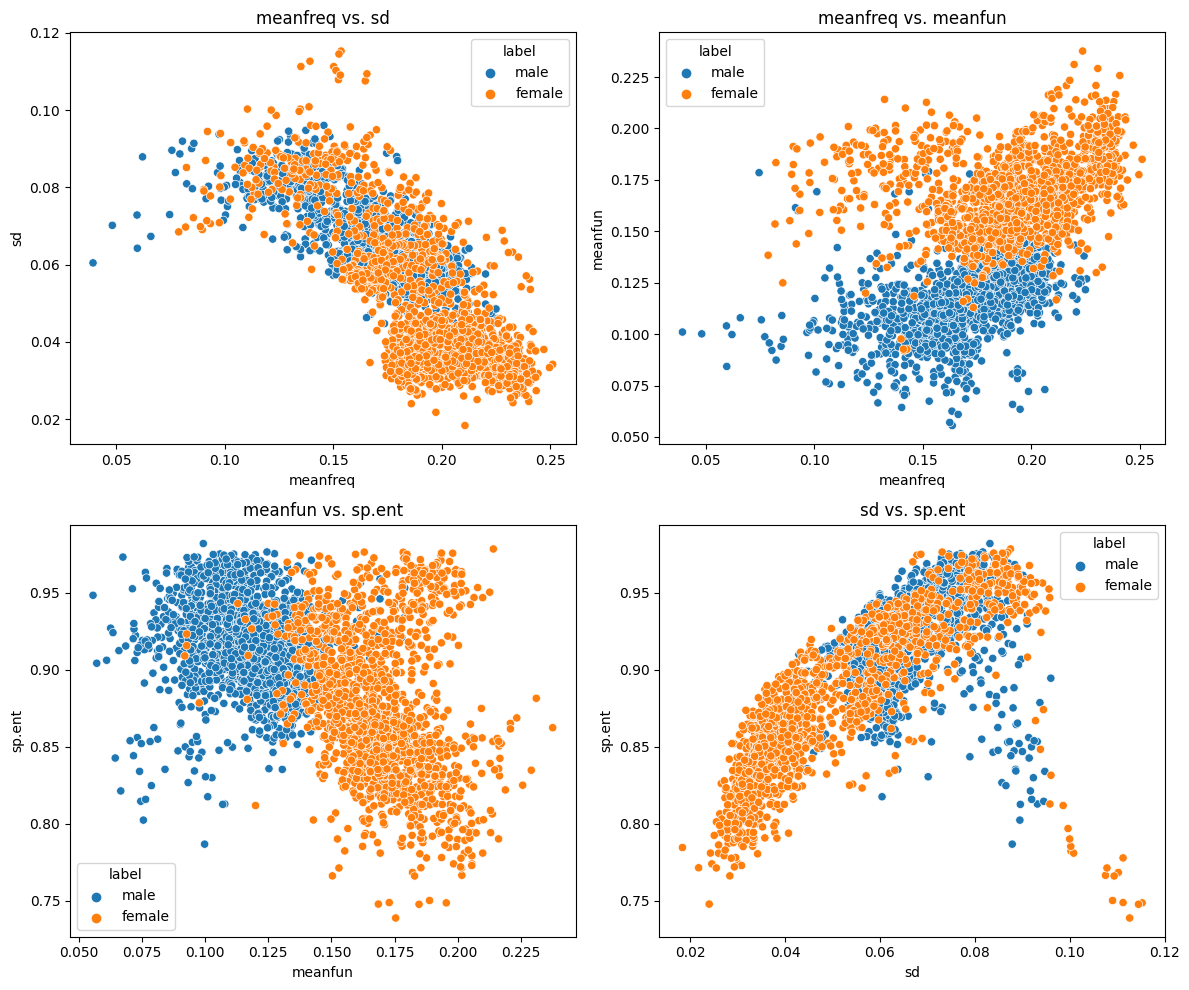

In [37]:
plt.figure(figsize=(12, 10))
plot_pairs = [(0, 1), (0, 2), (2, 3), (1, 3)]  # Pairs: meanfreq-sd, meanfreq-meanfun, meanfun-sp.ent, sd-sp.ent
for i, (x_idx, y_idx) in enumerate(plot_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[selected_cols[x_idx]], y=df[selected_cols[y_idx]], hue=df[categorical_col])
    plt.title(f'{selected_cols[x_idx]} vs. {selected_cols[y_idx]}')
    plt.xlabel(selected_cols[x_idx])
    plt.ylabel(selected_cols[y_idx])
plt.tight_layout()
plt.show()

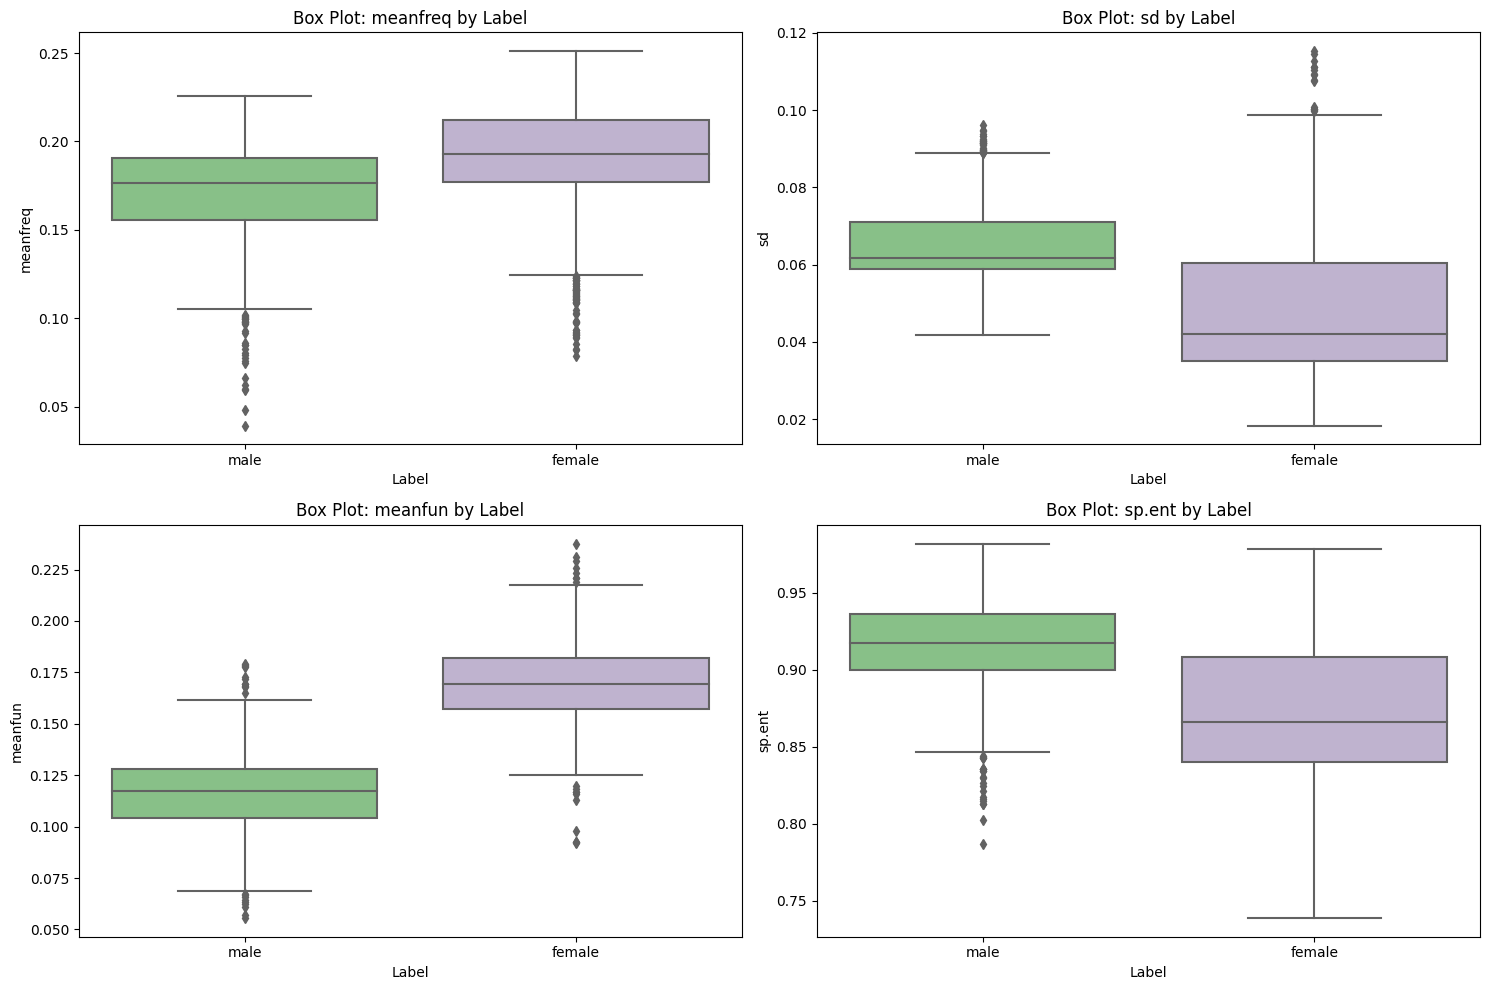

In [38]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=categorical_col, y=col, data=df,palette="Accent")
    plt.title(f'Box Plot: {col} by Label')
    plt.xlabel('Label')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

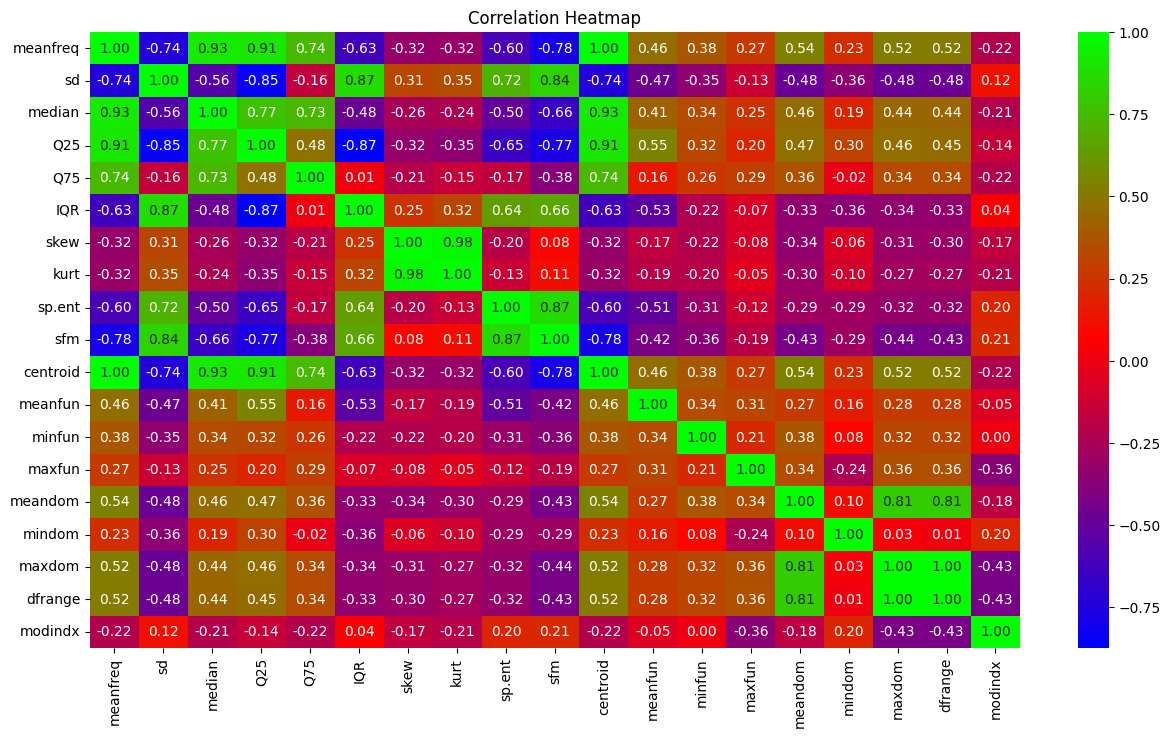

In [39]:
plt.figure(figsize=(15, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='brg', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

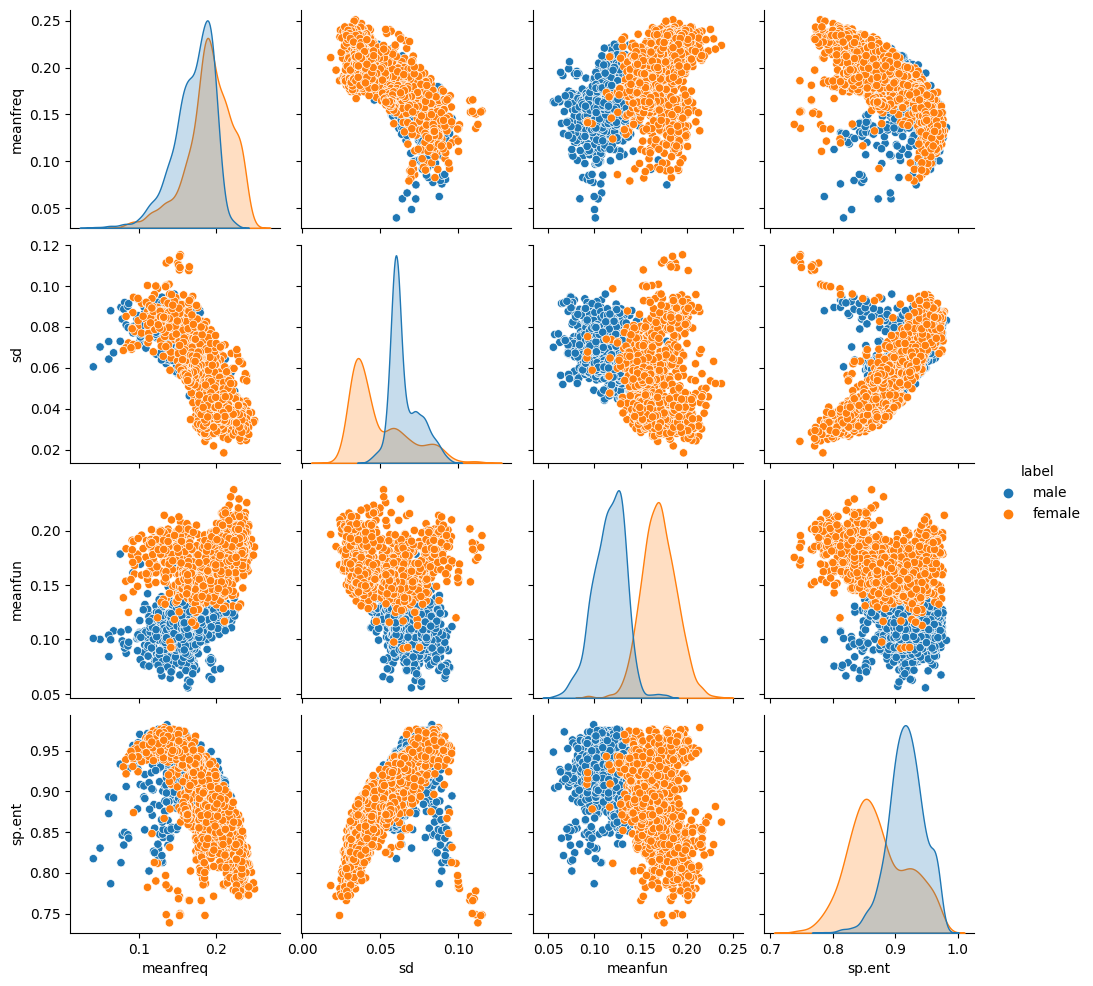

In [40]:
sns.pairplot(df[selected_cols + [categorical_col]], hue=categorical_col)
plt.show()

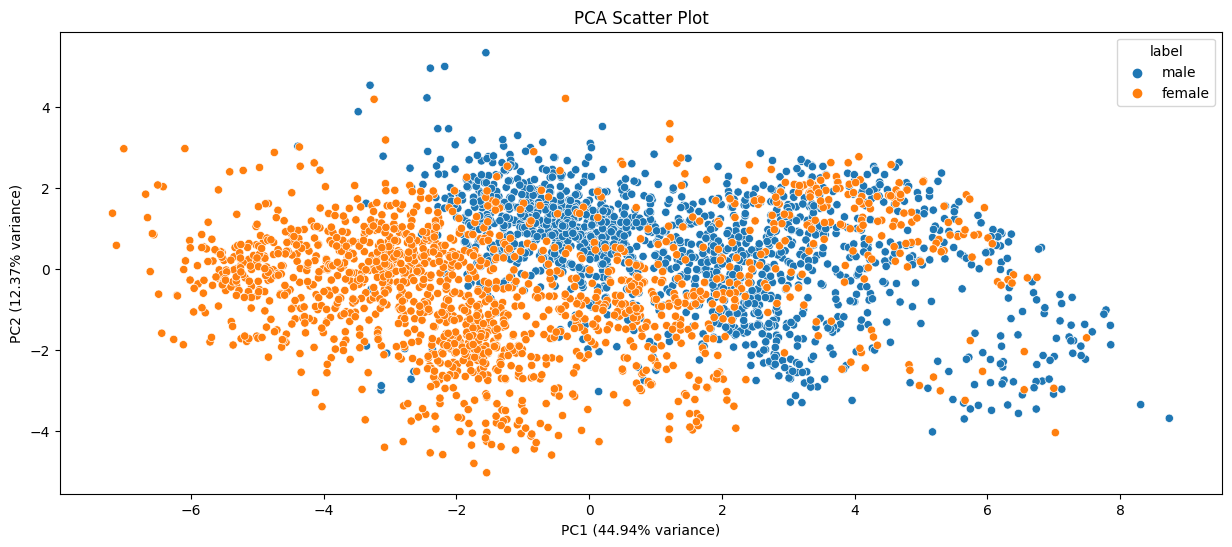

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[numerical_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df[categorical_col] = df[categorical_col]

plt.figure(figsize=(15, 6))
sns.scatterplot(x='PC1', y='PC2', hue=categorical_col, data=pca_df)
plt.title('PCA Scatter Plot')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.show()

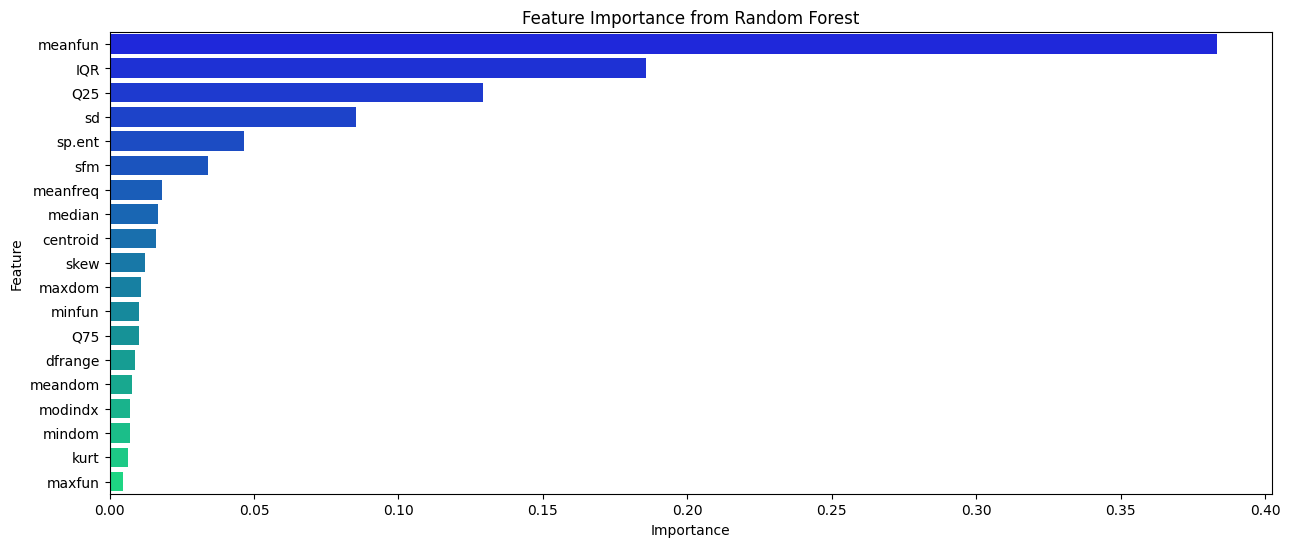

In [49]:
from sklearn.ensemble import RandomForestClassifier
y = df[categorical_col]
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': numerical_cols, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,palette="winter")
plt.title('Feature Importance from Random Forest')
plt.show()

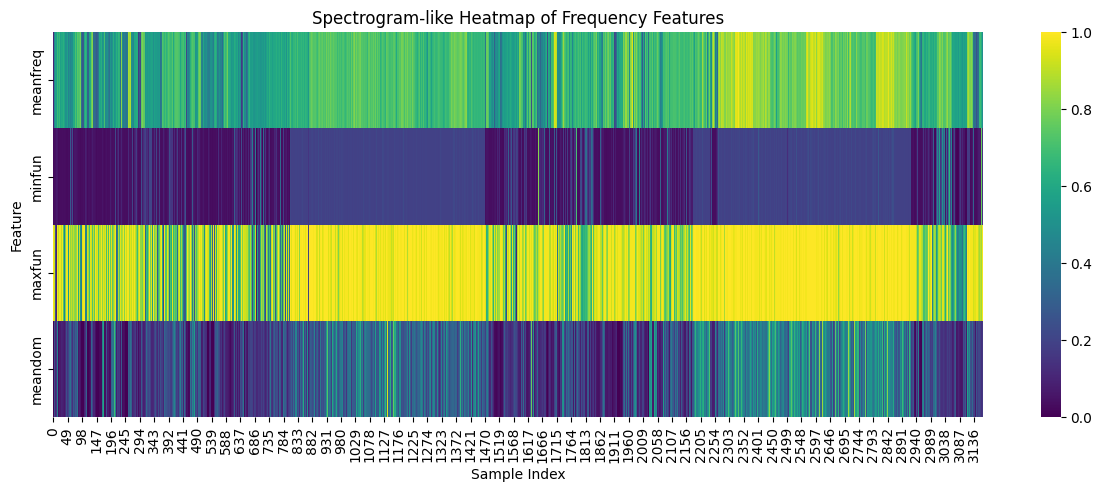

In [51]:
freq_cols = ['meanfreq', 'minfun', 'maxfun', 'meandom']
freq_data = df[freq_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))  # Normalize
plt.figure(figsize=(15, 5))
sns.heatmap(freq_data.T, cmap='viridis', cbar=True)
plt.title('Spectrogram-like Heatmap of Frequency Features')
plt.xlabel('Sample Index')
plt.ylabel('Feature')
plt.show()

In [59]:
top_5=feature_importance_df["Feature"].head(5).tolist()
df=df[top_5+[categorical_col]].copy()


In [57]:
df["label"] = df["label"].replace({"female": 0, "male": 1})


In [58]:
df.head()

,meanfun,IQR,Q25,sd,sp.ent,label
0,0.084279,0.075122,0.015071,0.064241,0.893369,1
1,0.107937,0.073252,0.019414,0.067310,0.892193,1
2,0.098706,0.123207,0.008701,0.083829,0.846389,1
3,0.088965,0.111374,0.096582,0.072111,0.963322,1
4,0.106398,0.127325,0.078720,0.079146,0.971955,1


In [68]:
cols = ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent']

print("Minimum values:\n", df[cols].min())
print("\nMaximum values:\n", df[cols].max())


Minimum values:
 meanfun    0.055565
IQR        0.014558
Q25        0.000229
sd         0.018363
sp.ent     0.738651
dtype: float64

Maximum values:
 meanfun    0.237636
IQR        0.252225
Q25        0.247347
sd         0.115273
sp.ent     0.981997
dtype: float64


In [60]:
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [61]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (2534, 5) (2534,)
Test shape: (634, 5) (634,)


In [63]:
model = CatBoostClassifier(verbose=100,learning_rate=0.1,random_state=42)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0:	learn: 0.4957583	total: 2.9ms	remaining: 2.9s
100:	learn: 0.0243424	total: 218ms	remaining: 1.94s
200:	learn: 0.0121520	total: 435ms	remaining: 1.73s
300:	learn: 0.0076705	total: 650ms	remaining: 1.51s
400:	learn: 0.0055919	total: 860ms	remaining: 1.28s
500:	learn: 0.0049894	total: 1.06s	remaining: 1.06s
600:	learn: 0.0049885	total: 1.26s	remaining: 836ms
700:	learn: 0.0045498	total: 1.46s	remaining: 623ms
800:	learn: 0.0041671	total: 1.66s	remaining: 411ms
900:	learn: 0.0041242	total: 1.85s	remaining: 204ms
999:	learn: 0.0040356	total: 2.05s	remaining: 0us
Accuracy: 0.9795


In [65]:
from sklearn.metrics import (
    f1_score, recall_score, precision_score, accuracy_score,
    roc_auc_score, cohen_kappa_score, matthews_corrcoef
)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
print("✅ Evaluation Metrics:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))

✅ Evaluation Metrics:
Accuracy Score: 0.9794952681388013
Precision Score: 0.9779874213836478
Recall Score: 0.9810725552050473
F1 Score: 0.9795275590551181
ROC AUC Score: 0.9985670073341361
Cohen's Kappa Score: 0.9589905362776026
Matthews Correlation Coefficient: 0.9589953079326781


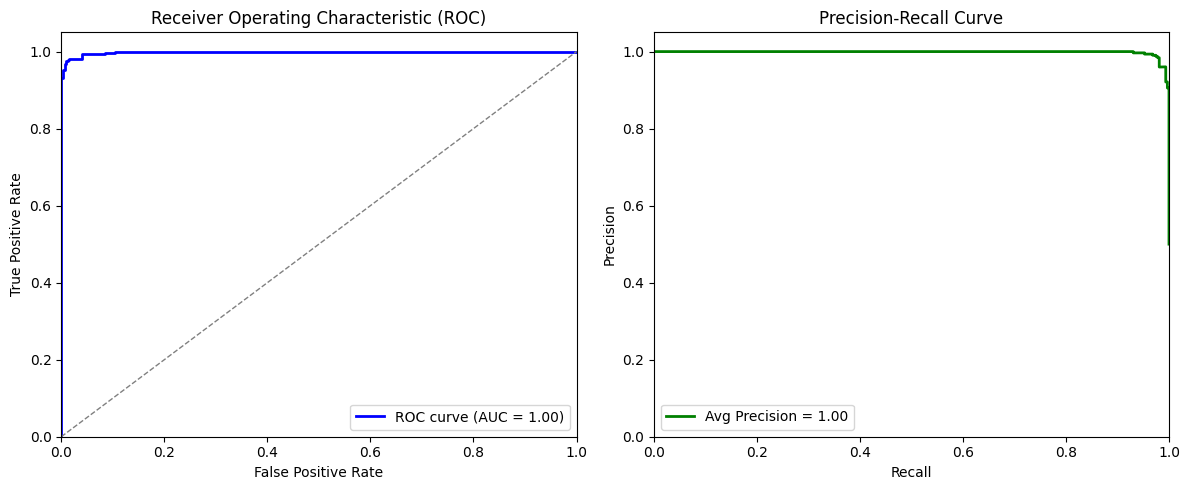

In [66]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve data
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
ax1.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC)')
ax1.legend(loc="lower right")

# Precision-Recall Curve
ax2.plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")

plt.tight_layout()
plt.show()


In [71]:
def predict_gender(new_data):
    """
    new_data: pd.DataFrame with columns ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent']
    Returns predicted gender labels (0=female, 1=male)
    """
    preds = model.predict(new_data)
    return preds

sample = pd.DataFrame({
    'meanfun': [0.1],
    'IQR': [0.07],
    'Q25': [0.02],
    'sd': [0.06],
    'sp.ent': [0.89]
})
gender_map = {0: "Female", 1: "Male"}

pred = model.predict(sample)
print("Predicted gender:", gender_map[pred[0]])

Predicted gender: Male


In [73]:
import pickle
f=open("catboost_classifier.pkl","wb")
pickle.dump(model,f)
f.close()

In [72]:
! pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.13
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
alembic==1.16.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.2
arrow==1.3.0
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.23.0.39.50
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
bayesian-optimization==3.0.0
beartype==0.21.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.0
bokeh==3.7.3
Boruta==0.4.3
boto3==1.39.1
botocore==1.39.1
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb